<a href="https://colab.research.google.com/github/pavankumarallu/K_ML/blob/main/NumberDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split as tts
import sklearn.metrics as metrics

import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
#missing values in train
print(train.isnull().any().sum())

#missing in test
print(test.isnull().any().sum())

0
0


In [ ]:
x = np.array(train.drop('label',axis=1))/255
x = x.reshape(-1,28,28,1)
print(x.shape)

y = np.array(train['label'])

(42000, 28, 28, 1)


In [ ]:
train_x,test_x,train_y,test_y = tts(x,y,test_size = 0.2)

In [ ]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1) (33600,) (8400,)


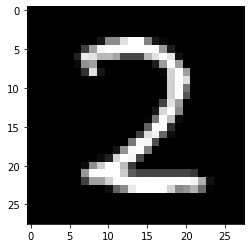

In [ ]:
sample = 6
image = train_x[sample].reshape(28,28)

fig = plt.figure
plt.imshow(image,cmap = 'gray')
plt.show()

In [ ]:
batch_size = 128
epochs = 110
epoch_to_wait_to_imporve = 10
num_classes = 10
seed = 7
random.seed(seed)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 12,
    width_shift_range = 0.11,
    height_shift_range = 0.11,
    shear_range = 0.15,
    zoom_range = 0.09,
    validation_split = 0.3,
    horizontal_flip = False,
    vertical_flip = False
)

In [ ]:
train_generator = datagen.flow(train_x,train_y,batch_size=batch_size,shuffle = True, subset='training')
test_generator = datagen.flow(test_x,test_y,batch_size=batch_size, subset='validation')

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3) , input_shape=(28,28,1),padding='Same',activation='relu'))
model.add(Conv2D(64, kernel_size = (3,3),padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (3,3),padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))
model.add(Dropout(0.2))


model.add(Flatten())


model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(num_classes,activation='softmax'))


In [ ]:
class myCallback(Callback):

  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.999):
      print('\nReached 99.9% accuracy so cancelling training')
      self.model.stop_training = True




mycallback = myCallback()
early_stopping_callbacks = EarlyStopping(monitor='val_loss',patience=epoch_to_wait_to_imporve,verbose=2,restore_best_weights=True)
optimizer = Adam(learning_rate=0.001,beta_1=0.9)
model.compile(optimizer=optimizer,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 64)        2

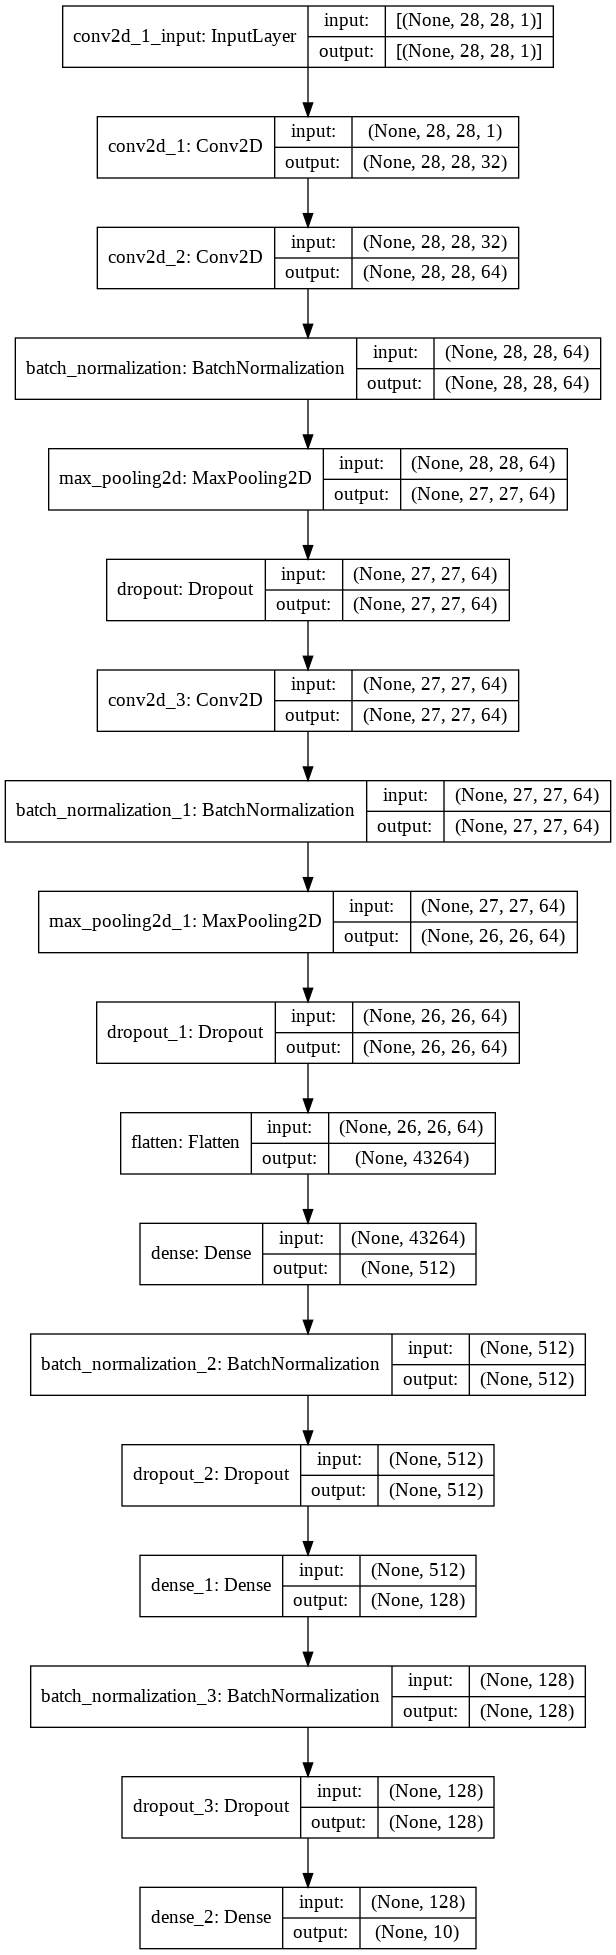

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

In [ ]:
history = model.fit(train_generator,epochs = epochs,validation_data=test_generator,callbacks=[mycallback,early_stopping_callbacks])

Epoch 1/110
184/184 [==============================] - 41s 50ms/step - loss: 0.3959 - accuracy: 0.8778 - val_loss: 70.1636 - val_accuracy: 0.1381
Epoch 2/110
184/184 [==============================] - 9s 48ms/step - loss: 0.1342 - accuracy: 0.9593 - val_loss: 156.3602 - val_accuracy: 0.1258
Epoch 3/110
184/184 [==============================] - 9s 47ms/step - loss: 0.1079 - accuracy: 0.9667 - val_loss: 48.4094 - val_accuracy: 0.2250
Epoch 4/110
184/184 [==============================] - 9s 47ms/step - loss: 0.0872 - accuracy: 0.9732 - val_loss: 0.4559 - val_accuracy: 0.8833
Epoch 5/110
184/184 [==============================] - 9s 47ms/step - loss: 0.0789 - accuracy: 0.9762 - val_loss: 0.0859 - val_accuracy: 0.9750
Epoch 6/110
184/184 [==============================] - 9s 47ms/step - loss: 0.0663 - accuracy: 0.9791 - val_loss: 0.1278 - val_accuracy: 0.9698
Epoch 7/110
184/184 [==============================] - 9s 47ms/step - loss: 0.0633 - accuracy: 0.9807 - val_loss: 4.6878 - val_accu

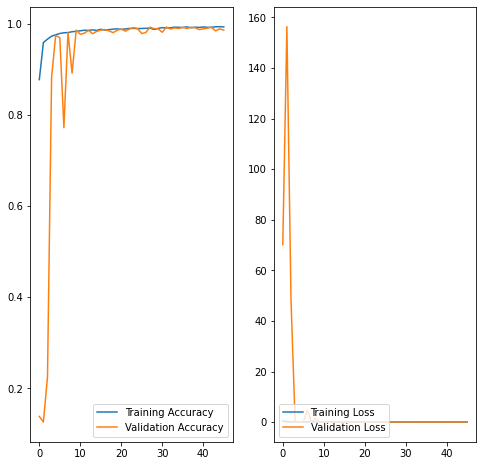

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label = 'Training Accuracy')
plt.plot(epochs_range,val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label = 'Training Loss')
plt.plot(epochs_range,val_loss,label = 'Validation Loss')
plt.legend(loc='lower left')

In [ ]:
test_loss,test_acc = model.evaluate(test_x,test_y,verbose= 5)
print(test_acc*100)

99.1428554058075


In [ ]:
y_pred = model.predict(test_x)
val_preds = np.argmax(y_pred,axis = 1)

val_trues = test_y
metrics.classification_report(val_trues,val_preds)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       857\n           1       1.00      0.98      0.99       931\n           2       0.99      1.00      0.99       793\n           3       1.00      1.00      1.00       888\n           4       1.00      0.98      0.99       783\n           5       0.99      0.99      0.99       742\n           6       0.99      0.99      0.99       835\n           7       0.99      1.00      0.99       898\n           8       0.98      0.99      0.99       844\n           9       0.99      0.99      0.99       829\n\n    accuracy                           0.99      8400\n   macro avg       0.99      0.99      0.99      8400\nweighted avg       0.99      0.99      0.99      8400\n'

In [ ]:
model_json = model.to_json


with open('model_json','w') as json_file:
  json_file.write(model_json)

model.save_weights('model.h5')